In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def entropy(p):
  if p==1 or p==0:
    return 0
  else:
    return -p*np.log2(p)-(1-p)*np.log2(1-p)

In [3]:
def split_indices(X,feature):
  left_indices=[]
  right_indices=[]
  for i,x in enumerate(X.to_numpy()):
    if x[feature]==1:
      left_indices.append(i)
    else:
      right_indices.append(i)
  return left_indices,right_indices

In [4]:
def weighted_entropy(X,y,left_indices,right_indices):
  w_left=len(left_indices)/len(X)
  w_right=len(right_indices)/len(X)
  p_left=np.sum(y[left_indices])/len(left_indices)
  p_right=np.sum(y[right_indices])/len(right_indices)

  weighted_entropy=w_left*entropy(p_left)+w_right*entropy(p_right)
  return weighted_entropy

In [5]:
def information_gain(X,y,left_indices,right_indices):
  p_node=np.sum(y)/len(y)
  h_node=entropy(p_node)
  w_entropy=weighted_entropy(X,y,left_indices,right_indices)
  return h_node-w_entropy

In [6]:
data={
    "Weather":[0,0,1,2,2,2,1,0,0,2,0,1,1,2],
    "Temperature":[0,0,0,1,2,2,2,1,2,1,1,1,0,1],
    "Humidity":[1,1,1,1,0,0,0,1,0,0,0,1,0,1],
    "Wind":[0,1,0,0,0,1,1,0,0,0,1,1,0,1],
    "Football?":[0,0,1,1,1,0,1,0,1,1,1,1,1,0]
}

df=pd.DataFrame(data)
print(df)

# If there are continuous values in the dataframe we sort the values and take mean of two consecutive values and get information gain of that split x>8 yes or no

    Weather  Temperature  Humidity  Wind  Football?
0         0            0         1     0          0
1         0            0         1     1          0
2         1            0         1     0          1
3         2            1         1     0          1
4         2            2         0     0          1
5         2            2         0     1          0
6         1            2         0     1          1
7         0            1         1     0          0
8         0            2         0     0          1
9         2            1         0     0          1
10        0            1         0     1          1
11        1            1         1     1          1
12        1            0         0     0          1
13        2            1         1     1          0


In [7]:
df = pd.get_dummies(df,columns=["Weather","Temperature",])
print(df)

    Humidity  Wind  Football?  Weather_0  Weather_1  Weather_2  Temperature_0  \
0          1     0          0          1          0          0              1   
1          1     1          0          1          0          0              1   
2          1     0          1          0          1          0              1   
3          1     0          1          0          0          1              0   
4          0     0          1          0          0          1              0   
5          0     1          0          0          0          1              0   
6          0     1          1          0          1          0              0   
7          1     0          0          1          0          0              0   
8          0     0          1          1          0          0              0   
9          0     0          1          0          0          1              0   
10         0     1          1          1          0          0              0   
11         1     1          

In [8]:
features=[x for x in df.columns if x not in "Football?"]
x=df[features]
y=df["Football?"]

print(x)
print(y)

    Humidity  Wind  Weather_0  Weather_1  Weather_2  Temperature_0  \
0          1     0          1          0          0              1   
1          1     1          1          0          0              1   
2          1     0          0          1          0              1   
3          1     0          0          0          1              0   
4          0     0          0          0          1              0   
5          0     1          0          0          1              0   
6          0     1          0          1          0              0   
7          1     0          1          0          0              0   
8          0     0          1          0          0              0   
9          0     0          0          0          1              0   
10         0     1          1          0          0              0   
11         1     1          0          1          0              0   
12         0     0          0          1          0              1   
13         1     1  

In [9]:
for i,n in enumerate(x.columns):
  left_indices,right_indices=split_indices(x,i-1)
  i_g=information_gain(x,y,left_indices,right_indices)

  print(f"Left indices for {n} are {left_indices}\nRight indices for {n} are {right_indices}\nInformation gain for this split is {i_g}\n\n\n")

Left indices for Humidity are [4, 5, 6, 8]
Right indices for Humidity are [0, 1, 2, 3, 7, 9, 10, 11, 12, 13]
Information gain for this split is 0.014956069928972804



Left indices for Wind are [0, 1, 2, 3, 7, 11, 13]
Right indices for Wind are [4, 5, 6, 8, 9, 10, 12]
Information gain for this split is 0.15183550136234159



Left indices for Weather_0 are [1, 5, 6, 10, 11, 13]
Right indices for Weather_0 are [0, 2, 3, 4, 7, 8, 9, 12]
Information gain for this split is 0.04812703040826949



Left indices for Weather_1 are [0, 1, 7, 8, 10]
Right indices for Weather_1 are [2, 3, 4, 5, 6, 9, 11, 12, 13]
Information gain for this split is 0.10224356360985076



Left indices for Weather_2 are [2, 6, 11, 12]
Right indices for Weather_2 are [0, 1, 3, 4, 5, 7, 8, 9, 10, 13]
Information gain for this split is 0.22600024438491684



Left indices for Temperature_0 are [3, 4, 5, 9, 13]
Right indices for Temperature_0 are [0, 1, 2, 6, 7, 8, 10, 11, 12]
Information gain for this split is 0.0031848530

In [10]:
# Like this we can apply this recursively for each node by changing x and y and picking node feature which has largest information gain

In [11]:
# Here also we can use the bias/variance method to select optimum model for training(i.e. degree of the features)

In [37]:
df=pd.read_csv('heart.csv')
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])

df = pd.get_dummies(df,columns=['ChestPainType',
'RestingECG',
'ST_Slope',])
print(df)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    1        140          289          0    172               0   
1     49    0        160          180          0    156               0   
2     37    1        130          283          0     98               0   
3     48    0        138          214          0    108               1   
4     54    1        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    1        110          264          0    132               0   
914   68    1        144          193          1    141               0   
915   57    1        130          131          0    115               1   
916   57    0        130          236          0    174               0   
917   38    1        138          175          0    173               0   

     Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0        0.0             0     

In [46]:
features = [x for x in df.columns if x not in 'HeartDisease']

X_train, X_, y_train, y_ = train_test_split(df[features], df['HeartDisease'], train_size = 0.5, random_state = 50)
X__, X_test, y__, y_test = train_test_split(X_, y_, train_size = 0.75, random_state = 50)
X_eval, X_val, y_eval, y_val = train_test_split(X__, y__, train_size = 0.5, random_state = 50)

# Can also add polynomial features and need to normalize the data

In [40]:
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import accuracy_score

[0]	validation_0-logloss:0.63967
[1]	validation_0-logloss:0.59703
[2]	validation_0-logloss:0.56251
[3]	validation_0-logloss:0.53173
[4]	validation_0-logloss:0.51046
[5]	validation_0-logloss:0.48888
[6]	validation_0-logloss:0.47174
[7]	validation_0-logloss:0.45530
[8]	validation_0-logloss:0.44520
[9]	validation_0-logloss:0.43156
[10]	validation_0-logloss:0.41820
[11]	validation_0-logloss:0.41232
[12]	validation_0-logloss:0.40313
[13]	validation_0-logloss:0.39485
[14]	validation_0-logloss:0.38646
[15]	validation_0-logloss:0.38318
[16]	validation_0-logloss:0.37645
[17]	validation_0-logloss:0.37186
[18]	validation_0-logloss:0.36696
[19]	validation_0-logloss:0.36285
[20]	validation_0-logloss:0.36155
[21]	validation_0-logloss:0.35673
[22]	validation_0-logloss:0.35315
[23]	validation_0-logloss:0.35064
[24]	validation_0-logloss:0.34660
[25]	validation_0-logloss:0.34357
[26]	validation_0-logloss:0.34151
[27]	validation_0-logloss:0.33842
[28]	validation_0-logloss:0.33652
[29]	validation_0-loglos

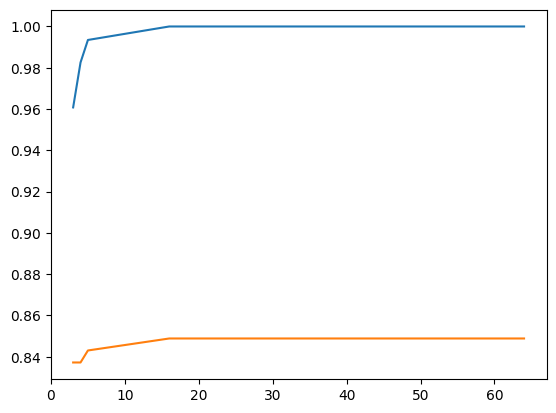

In [41]:
accuracy_list_train=[]
accuracy_list_val=[]

max_depth=[3,4,5,16,32,64,None]

for i in max_depth:
  model=XGBClassifier(max_depth=i, learning_rate = 0.1,verbosity = 1, random_state = 50)
  model.fit(X_train,y_train, eval_set = [(X_eval,y_eval)])
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)

plt.plot(max_depth,accuracy_list_train)
plt.plot(max_depth,accuracy_list_val)
plt.show()

In [42]:
print(accuracy_list_val)
max_depth_opt=max_depth[np.argmax(accuracy_list_val)]
print(max_depth_opt)

[0.8372093023255814, 0.8372093023255814, 0.8430232558139535, 0.8488372093023255, 0.8488372093023255, 0.8488372093023255, 0.8372093023255814]
16


[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.60199
[2]	validation_0-logloss:0.56821
[3]	validation_0-logloss:0.54251
[4]	validation_0-logloss:0.52181
[5]	validation_0-logloss:0.50159
[6]	validation_0-logloss:0.48686
[7]	validation_0-logloss:0.47071
[8]	validation_0-logloss:0.45823
[9]	validation_0-logloss:0.44796
[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.60199
[2]	validation_0-logloss:0.56821
[3]	validation_0-logloss:0.54251
[4]	validation_0-logloss:0.52181
[5]	validation_0-logloss:0.50159
[6]	validation_0-logloss:0.48686
[7]	validation_0-logloss:0.47071
[8]	validation_0-logloss:0.45823
[9]	validation_0-logloss:0.44796
[10]	validation_0-logloss:0.43726
[11]	validation_0-logloss:0.42964
[12]	validation_0-logloss:0.42082
[13]	validation_0-logloss:0.41632
[14]	validation_0-logloss:0.41002
[15]	validation_0-logloss:0.40564
[16]	validation_0-logloss:0.40068
[17]	validation_0-logloss:0.39671
[18]	validation_0-logloss:0.39078
[19]	validation_0-logloss:0.38750


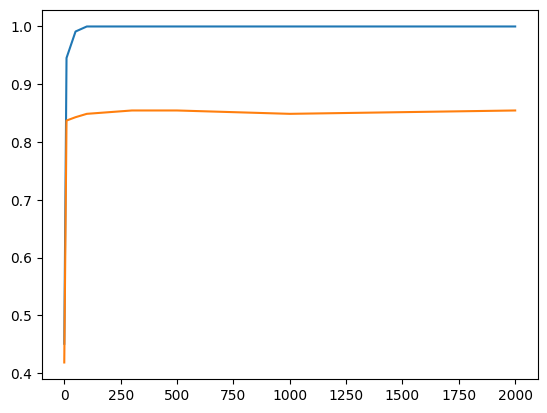

In [43]:
accuracy_list_train=[]
accuracy_list_val=[]

n_estimators=[0,10,50,100,300,500,1000,2000]

for i in n_estimators:
  model=XGBClassifier(n_estimators = i, max_depth=max_depth_opt,learning_rate = 0.1,verbosity = 1, random_state = 50)
  model.fit(X_train,y_train, eval_set = [(X_eval,y_eval)])
  predictions_train = model.predict(X_train)
  predictions_val = model.predict(X_val)
  accuracy_train = accuracy_score(predictions_train,y_train)
  accuracy_val = accuracy_score(predictions_val,y_val)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_val.append(accuracy_val)

plt.plot(n_estimators,accuracy_list_train)
plt.plot(n_estimators,accuracy_list_val)
plt.show()

In [44]:
# So we can select max validation accuracy from the list and keep corresponding no of estimators
# Similarly we can also select other parameter like learning rate and max_depth
print(accuracy_list_val)
n_estimators_opt=n_estimators[np.argmax(accuracy_list_val)]
print(n_estimators_opt)

[0.4186046511627907, 0.8372093023255814, 0.8430232558139535, 0.8488372093023255, 0.8546511627906976, 0.8546511627906976, 0.8488372093023255, 0.8546511627906976]
300


In [45]:
model=XGBClassifier(n_estimators = n_estimators_opt,max_depth=max_depth_opt, learning_rate = 0.1,verbosity = 1, random_state = 50)
model.fit(X_train,y_train, eval_set = [(X_eval,y_eval)])
predictions_test = model.predict(X_test) ## The predicted values for the train dataset
accuracy_test = accuracy_score(predictions_test,y_test)
print(accuracy_test)

[0]	validation_0-logloss:0.64116
[1]	validation_0-logloss:0.60199
[2]	validation_0-logloss:0.56821
[3]	validation_0-logloss:0.54251
[4]	validation_0-logloss:0.52181
[5]	validation_0-logloss:0.50159
[6]	validation_0-logloss:0.48686
[7]	validation_0-logloss:0.47071
[8]	validation_0-logloss:0.45823
[9]	validation_0-logloss:0.44796
[10]	validation_0-logloss:0.43726
[11]	validation_0-logloss:0.42964
[12]	validation_0-logloss:0.42082
[13]	validation_0-logloss:0.41632
[14]	validation_0-logloss:0.41002
[15]	validation_0-logloss:0.40564
[16]	validation_0-logloss:0.40068
[17]	validation_0-logloss:0.39671
[18]	validation_0-logloss:0.39078
[19]	validation_0-logloss:0.38750
[20]	validation_0-logloss:0.38605
[21]	validation_0-logloss:0.38393
[22]	validation_0-logloss:0.38494
[23]	validation_0-logloss:0.37895
[24]	validation_0-logloss:0.37816
[25]	validation_0-logloss:0.37711
[26]	validation_0-logloss:0.37749
[27]	validation_0-logloss:0.37386
[28]	validation_0-logloss:0.37115
[29]	validation_0-loglos